In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

def plot_stripes(df, x_col, y_col, x_col_lbl, y_col_lbl,title="Stripes Plot"):
    """
    Plots a stripes chart for the given DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        x_col (str): The column to be used for the x-axis (categorical).
        y_col (str): The column to be used for the y-axis (numerical).
        title (str): The title of the plot.
    """

    plt.figure(figsize=(12, 6))
    sns.stripplot(x=x_col, y=y_col, data=df, jitter=True, alpha=0.7)
    plt.title(title)
    plt.xlabel(x_col_lbl)
    plt.ylabel(y_col_lbl)
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

def plot_groups(df, group1, group2, group3, title="Group Plot"):
    """
    Plots a stripes chart for the given DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        x_col (str): The column to be used for the x-axis (categorical).
        y_col (str): The column to be used for the y-axis (numerical).
        title (str): The title of the plot.
    """

    df_grouped = df.groupby([group1, group2, group3]).size().reset_index(name="count")

    # Create Sunburst Chart
    fig = px.sunburst(
    df_grouped,
    path=[group1, group2, group3],  # Hierarchical levels
    values="count",
    title=title,
    color="count",
    color_continuous_scale="Blues"
    )

    # Show Chart
    fig.show()

def plot_hist(df, plotFld,xlabel,ylabel,title="Hist Plot"):
    """
    Plots a stripes chart for the given DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        x_col (str): The column to be used for the x-axis (categorical).
        y_col (str): The column to be used for the y-axis (numerical).
        title (str): The title of the plot.
    """

    # Set style
    sns.set(style="whitegrid")

    # Plot histogram of total streams
    plt.figure(figsize=(12, 6))
    sns.histplot(df[plotFld], bins=25, kde=True, color='mediumseagreen')

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

def plot_scatter(df):

    # brightest_stars.csv = Dataset

    # Set plot style
    sns.set(style="whitegrid")

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(
        data=df,
        x='Distance_LY',
        y='Apparent_Magnitude',
        hue='Constellation',
        s=100,
        palette='tab10'
    )

    # Invert y-axis because lower magnitude = brighter
    plt.gca().invert_yaxis()

    # Add labels
    for i in range(df.shape[0]):
        plt.text(
            df.Distance_LY[i],
            df.Apparent_Magnitude[i] + 0.05,
            df.Name[i],
            fontsize=8,
            ha='center'
        )

    plt.title('Brightest Stars: Apparent Magnitude vs Distance')
    plt.xlabel('Distance (light years)')
    plt.ylabel('Apparent Magnitude')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv("/content/gdrive/My Drive/brightest_stars.csv")

# Quick preview
print(df.head())
print(df.info())


Mounted at /content/gdrive
              Name  Apparent_Magnitude  Distance_LY Constellation
0           Sirius               -1.46          8.6   Canis Major
1          Canopus               -0.74        310.0        Carina
2  Rigil Kentaurus               -0.27          4.4     Centaurus
3         Arcturus               -0.05         37.0        Boötes
4             Vega                0.03         25.0          Lyra
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                15 non-null     object 
 1   Apparent_Magnitude  15 non-null     float64
 2   Distance_LY         15 non-null     float64
 3   Constellation       15 non-null     object 
dtypes: float64(2), object(2)
memory usage: 612.0+ bytes
None


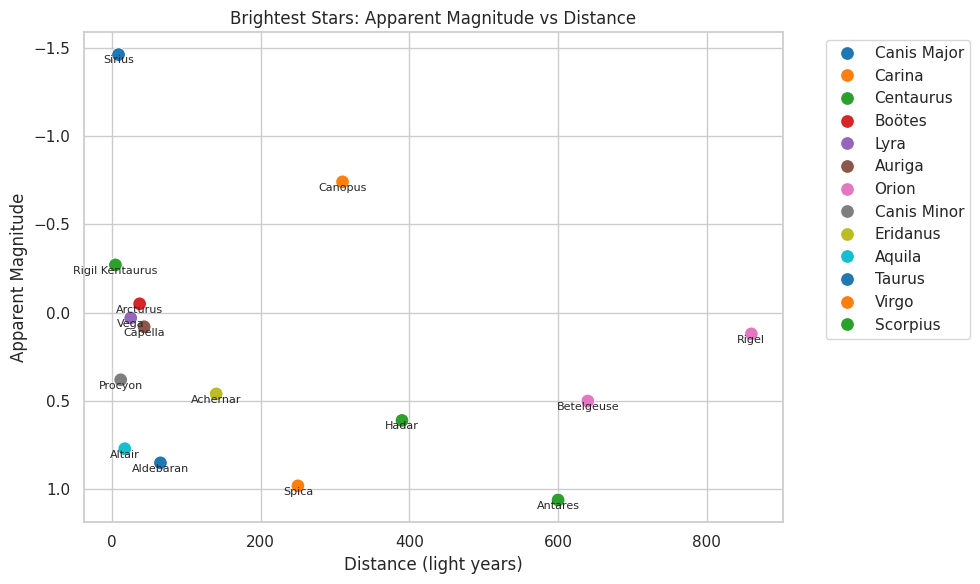

In [ ]:
plot_scatter(df)